In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import file from external storage
df = pd.read_csv('wbc.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# drop unusable column from dataframe
df.drop(['id', 'Unnamed: 32' ], axis = 1, inplace = True)

In [4]:
# dataframe after drop unusable columns
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# check null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
# encode output data for better prediction
df['diagnosis'] =  df['diagnosis'].map({'M':1,'B':0})

# Start Model Building

In [11]:
# ceate x and y for spliting
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [44]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [45]:
y_pred = knc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [46]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Roc Auc Score:', roc_auc_score(y_test,y_pred))

Accuracy Score: 0.9385964912280702
Roc Auc Score: 0.9274296675191817


# Check Cross Val Score With Diff.-Diff. K Value

In [47]:
from sklearn.model_selection import cross_val_score
k_value = [1,2,3,4,5,6,7,8,9,10,20]
for i in k_value:
    knc = KNeighborsClassifier(i)
    knc.fit(X_train,y_train)
    train_acc = roc_auc_score(y_train,knc.predict(X_train))
    val_acc = cross_val_score(knc,X_train,y_train,cv = 10)
    print('K Value:',i,'Train Accuracy:',train_acc,'VAl Accuracy:', np.mean(val_acc))
    

K Value: 1 Train Accuracy: 1.0 VAl Accuracy: 0.9603864734299516
K Value: 2 Train Accuracy: 0.9668674698795181 VAl Accuracy: 0.9626570048309178
K Value: 3 Train Accuracy: 0.9711614624588318 VAl Accuracy: 0.9647826086956522
K Value: 4 Train Accuracy: 0.9668674698795181 VAl Accuracy: 0.9627053140096619
K Value: 5 Train Accuracy: 0.9801976070371451 VAl Accuracy: 0.9647826086956522
K Value: 6 Train Accuracy: 0.963855421686747 VAl Accuracy: 0.962657004830918
K Value: 7 Train Accuracy: 0.9664193104598324 VAl Accuracy: 0.9714492753623188
K Value: 8 Train Accuracy: 0.9681494142660608 VAl Accuracy: 0.9693236714975846
K Value: 9 Train Accuracy: 0.9711614624588318 VAl Accuracy: 0.9693236714975846
K Value: 10 Train Accuracy: 0.9651373660732897 VAl Accuracy: 0.9693236714975846
K Value: 20 Train Accuracy: 0.9518072289156627 VAl Accuracy: 0.9561835748792271


**IN Here K Value 6 Is Giving Better Result**

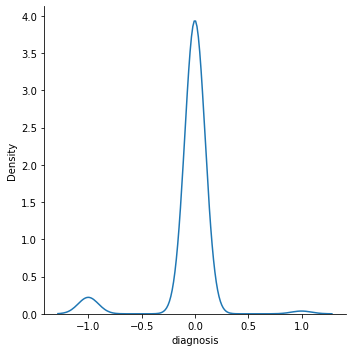

In [48]:
sns.displot(y_pred-y_test,kind = 'kde')
plt.show()